In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Hotel_Reviews.csv")

In [3]:
df.head(2)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968


In [4]:
# replace 'No Negative' or 'No Positive' with space
df["Positive_Review"] = df["Positive_Review"].apply(lambda x: x.replace("No Positive", ""))
df["Negative_Review"] = df["Negative_Review"].apply(lambda x: x.replace("No Negative", ""))

In [5]:
# append the positive and negative text reviews
df["review"] = df["Negative_Review"] + df["Positive_Review"]

In [6]:
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
review                                           0
dtype: int64

In [7]:
df.head(2)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No real complaints the hotel was great great ...


In [8]:
# create the target variable from reviewer score. Score is 1 if reviewer score is above 5 and 0 otherwise
df["good_or_bad_review"] = df["Reviewer_Score"].apply(lambda x: 0 if x < 5 else 1)

In [9]:
df.head(2)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,review,good_or_bad_review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...,0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No real complaints the hotel was great great ...,1


In [10]:
# select relevant columns
review_df = df[["Negative_Review", "review", "Positive_Review", "Reviewer_Score", "good_or_bad_review"]]
review_df.head()

,Negative_Review,review,Positive_Review,Reviewer_Score,good_or_bad_review
0,I am so angry that i made this post available...,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9,0
1,,No real complaints the hotel was great great ...,No real complaints the hotel was great great ...,7.5,1
2,Rooms are nice but for elderly a bit difficul...,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1,1
3,My room was dirty and I was afraid to walk ba...,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,3.8,0
4,You When I booked with your company on line y...,You When I booked with your company on line y...,Amazing location and building Romantic setting,6.7,1


In [11]:
review_df = review_df[["review","good_or_bad_review"]]
review_df.head()

,review,good_or_bad_review
0,I am so angry that i made this post available...,0
1,No real complaints the hotel was great great ...,1
2,Rooms are nice but for elderly a bit difficul...,1
3,My room was dirty and I was afraid to walk ba...,0
4,You When I booked with your company on line y...,1


In [12]:
review_df['good_or_bad_review'].value_counts()

1    493457
0     22281
Name: good_or_bad_review, dtype: int64

We want to take 'reviews' as our dependent variable and 'good_or_bad_review?' as our target variable

percentage of reviews

AxesSubplot(0.125,0.125;0.775x0.755)


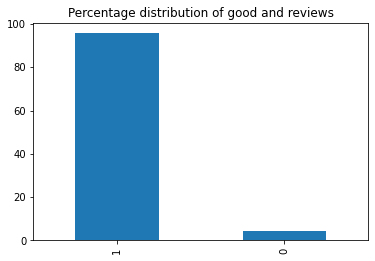

In [13]:
#checking for distribution of good and bad reviews
print('percentage of reviews\n')
print(round(review_df.good_or_bad_review.value_counts(normalize=True)*100,2).plot(kind = 'bar'))
round(review_df.good_or_bad_review.value_counts(normalize=True)*100,2).plot(kind = 'bar')
plt.title('Percentage distribution of good and reviews')
plt.show()

The plot shows that less than 10% of reviews are bad and over 90% of reviews are good

Text Cleaning:

In [14]:
import re
import string

#This function convert to lower case, removes square brackets, numbers, punctuations, new lines
def text_clean(text):
    text = text.lower()
    text = re.sub('\[,*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[''""_]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned = lambda x: text_clean(x)

In [15]:
#Let's take a look at the cleaned text
review_df['cleaned_reviews'] = pd.DataFrame(review_df.review.apply(cleaned))

In [16]:
review_df.head()

,review,good_or_bad_review,cleaned_reviews
0,I am so angry that i made this post available...,0,i am so angry that i made this post available...
1,No real complaints the hotel was great great ...,1,no real complaints the hotel was great great ...
2,Rooms are nice but for elderly a bit difficul...,1,rooms are nice but for elderly a bit difficul...
3,My room was dirty and I was afraid to walk ba...,0,my room was dirty and i was afraid to walk ba...
4,You When I booked with your company on line y...,1,you when i booked with your company on line y...


##### Model Training

In [17]:
from sklearn.model_selection import train_test_split

X = review_df['cleaned_reviews']
y = review_df['good_or_bad_review']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 0 )

In [19]:
print('X_train:', len(X_train))
print('X_test:', len(X_test))
print('y_train:', len(y_train))
print('y_test:', len(y_test))

X_train: 412590
X_test: 103148
y_train: 412590
y_test: 103148


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf = LogisticRegression(solver = 'sag')

In [21]:
from sklearn.pipeline import Pipeline

model = Pipeline([('vectorizer', tvec), ('classifier', clf)])

In [22]:
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(solver='sag'))])

In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

con_mat = confusion_matrix(y_pred, y_test)
con_mat

array([[ 1051,   470],
       [ 3387, 98240]], dtype=int64)

In [25]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9626071276224454

In [26]:
precision = precision_score(y_pred, y_test)
precision

0.995238577651707

In [27]:
recall = recall_score(y_pred, y_test)
recall

0.9666722426126915

In [31]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [32]:
model2 = Pipeline([('vectorizer', tvec), ('classifier', classifier)])

In [33]:
model2.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [34]:
y_pred2 = model.predict(X_test)

In [35]:
con_mat2 = confusion_matrix(y_pred2, y_test)
con_mat2

array([[ 1051,   470],
       [ 3387, 98240]], dtype=int64)

In [36]:
accuracy2 = accuracy_score(y_pred, y_test)
accuracy2

0.9626071276224454

In [37]:
precision2 = precision_score(y_pred, y_test)
precision2

0.995238577651707

In [38]:
recall2 = recall_score(y_pred, y_test)
recall2

0.9666722426126915

### Try new reviews:

In [39]:
review1 = ['The hotel was excellent']
result = model.predict(review1)
result

array([1], dtype=int64)

In [40]:
review1 = ['The hotel was excellent']
result = model2.predict(review1)
result

array([1], dtype=int64)

In [41]:
review2 = ['There was no parking space']
result2 = model.predict(review2)
result2

array([1], dtype=int64)

In [42]:
review2 = ['There was no parking space']
result2 = model2.predict(review2)
result2

array([1], dtype=int64)

In [43]:
review3 = ['i had a horrible experience']
result3 = model.predict(review3)
result3

array([0], dtype=int64)

In [44]:
review3 = ['i had a horrible experience']
result3 = model2.predict(review3)
result3

array([1], dtype=int64)